In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
# Loading data and column names
data = pd.read_csv(r"C:\Users\NTres\OneDrive\Documents\GitHub\Brain_stroke_classification\brain_stroke.csv")
column_names = data.columns.tolist()

# Checking number of missing data and data types in columns
for column in column_names:
    Sum = data[column].isna().sum()
    if Sum > 0:
        print("Column {} contains {} Nan values.".format(column, Sum))
    print("Column {} consists of {}".format(column, data[column].dtype))


Column gender consists of object
Column age consists of float64
Column hypertension consists of int64
Column heart_disease consists of int64
Column ever_married consists of object
Column work_type consists of object
Column Residence_type consists of object
Column avg_glucose_level consists of float64
Column bmi consists of float64
Column smoking_status consists of object
Column stroke consists of int64


In [11]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [3]:
pd.set_option('display.max_columns', None)
# Use pd.get_dummies to perform one-hot-encoding
encoded_data = pd.get_dummies(data, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"],dtype='int')
column_names = encoded_data.columns.tolist() #Updating column names
# Extracting features (excluding target variable):
features = encoded_data.drop(columns=['stroke'])
# Inspecting data:
encoded_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789,0.583618,0.416382,0.341498,0.658502,0.129291,0.574182,0.161413,0.135113,0.491668,0.508332,0.301144,0.174061,0.369002,0.155792
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531,0.493008,0.493008,0.474260,0.474260,0.335556,0.494516,0.367949,0.341879,0.499981,0.499981,0.458801,0.379200,0.482583,0.362694
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Considerations from inspection above:
- It seems like there could be one or more outliers in "avg_glucose_level" as a value of 271.74 is extremely high
- All continuous values should probably be standardized in some way

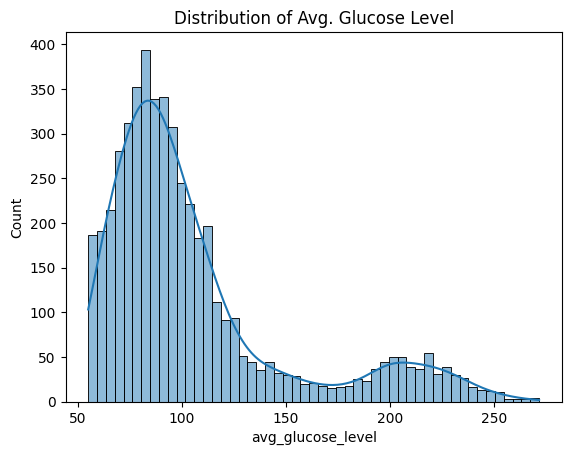

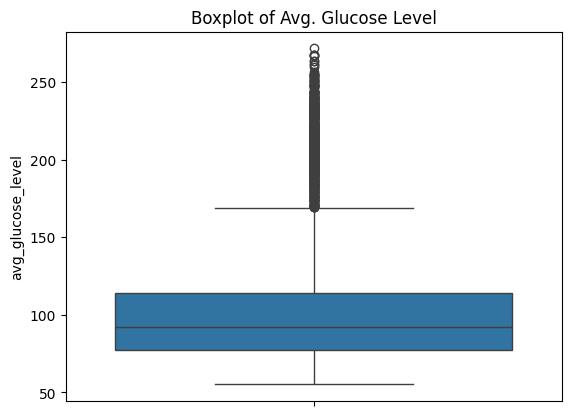

In [4]:
# Visualizing the avg. glucose levels to try determine whether there are outliers or not. 

sns.histplot(features["avg_glucose_level"], kde=True)
plt.title("Distribution of Avg. Glucose Level")
plt.show()

sns.boxplot(features["avg_glucose_level"])
plt.title("Boxplot of Avg. Glucose Level")
plt.show()


In [5]:
features["avg_glucose_level"].describe()

count    4981.000000
mean      105.943562
std        45.075373
min        55.120000
25%        77.230000
50%        91.850000
75%       113.860000
max       271.740000
Name: avg_glucose_level, dtype: float64

Based on the analysis above, I will not sort out any outliers as the values theoretically fell in the range of avg. glucose levels. Furthermore, it's a relatively big part of the dataset that lies in the spectrum considered potential outliers using the Interquartile range (Above 12%).

In [6]:
# Standardizing columns:

#Defining scaler
scaler = StandardScaler()

# Convert scaled features back to DataFrame
binary_features = features[["hypertension", "heart_disease", "gender_Female", "gender_Male", "ever_married_No", "ever_married_Yes",	"work_type_Govt_job", "work_type_Private", "work_type_Self-employed", "work_type_children",	"Residence_type_Rural",	"Residence_type_Urban",	"smoking_status_Unknown", "smoking_status_formerly smoked",	"smoking_status_never smoked",	"smoking_status_smokes"]]
continuous_features = features[["age", "avg_glucose_level", "bmi"]]
scaled_continuous = scaler.fit_transform(continuous_features)
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=continuous_features.columns, index=features.index)

#Combine continuous and discrete features:
features_df = pd.concat([scaled_continuous_df, binary_features], axis=1)
features_df.describe()

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4.981000e+03,4.981000e+03,4.981000e+03,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,2.853012e-18,1.169735e-16,-6.219567e-16,0.096165,0.055210,0.583618,0.416382,0.341498,0.658502,0.129291,0.574182,0.161413,0.135113,0.491668,0.508332,0.301144,0.174061,0.369002,0.155792
std,1.000100e+00,1.000100e+00,1.000100e+00,0.294848,0.228412,0.493008,0.493008,0.474260,0.474260,0.335556,0.494516,0.367949,0.341879,0.499981,0.499981,0.458801,0.379200,0.482583,0.362694
min,-1.912575e+00,-1.127637e+00,-2.135293e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.128627e-01,-6.370761e-01,-7.066756e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.973111e-02,-3.126979e-01,-5.864298e-02,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.758062e-01,1.756443e-01,6.041176e-01,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.702530e+00,3.678574e+00,3.004784e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


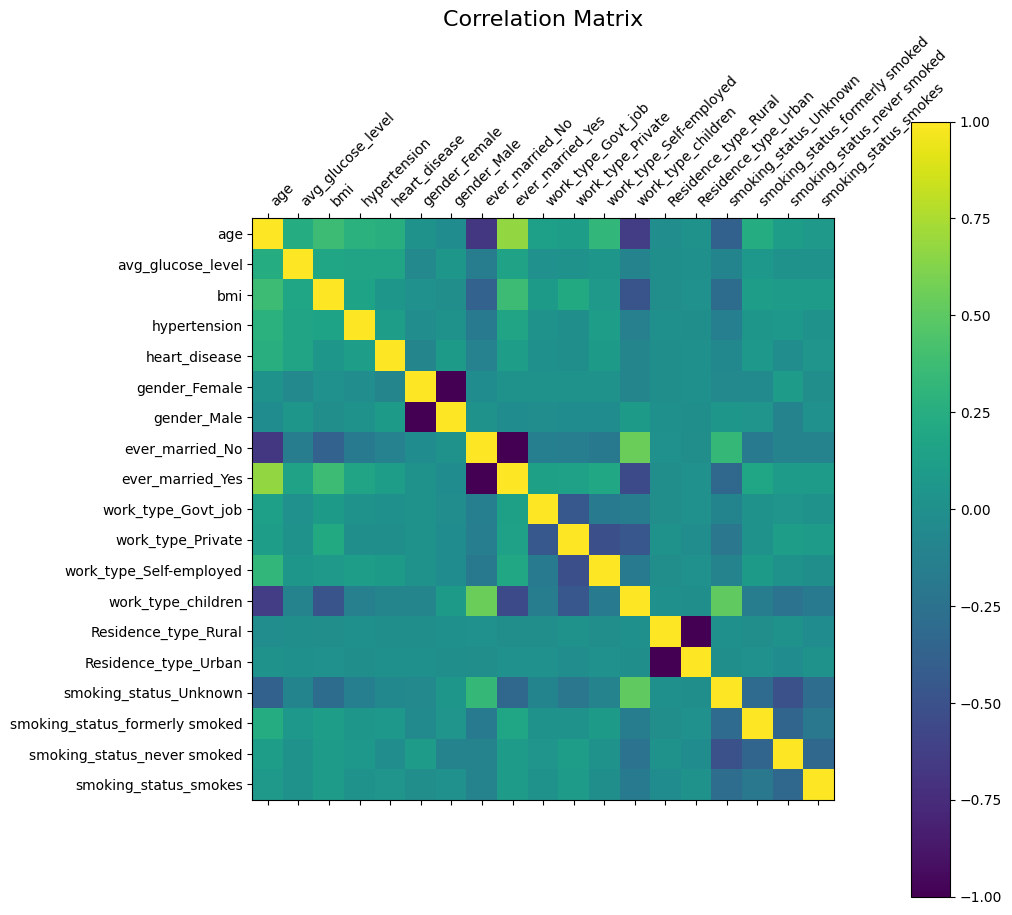

In [7]:
fig = plt.figure(figsize=(10,10))
plt.matshow(features_df.corr(), fignum=fig.number)

# Colorbar
cb = plt.colorbar(pad=0.1)
cb.ax.tick_params(labelsize=10)

# Set x-tick locations and labels
num_columns = len(features_df.columns)  # Get the number of columns in the data
xticks_locations = np.arange(num_columns)  # X-axis positions (range from 0 to number of columns)
plt.xticks(xticks_locations, features_df.columns, rotation=45, ha='left', va='bottom')  # Set the column names as labels

# Set y-tick locations and labels (similar to xticks)
yticks_locations = np.arange(num_columns)  # Y-axis positions
plt.yticks(yticks_locations, features_df.columns)  # Set the column names as labels for the y-axis

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()